**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')



**Uploading the Data Set**

**Reading the Data Set**

In [2]:
df = pd.read_csv('/content/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.shape

(28297, 11)

**Dropping Duplicates**

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
print(f'Updated Shape :{df.shape}')

Updated Shape :(28297, 11)


There were no duplicate values so no values dropped

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [8]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

As we can See that we Have null Values in our Data Set

**Dropping The row containing Null Values**

In [9]:
df.dropna(subset=['oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'], inplace=True)

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**There are no Null values now. Hence proceeding with Data Analysis**

In [11]:
df['type'].value_counts()

PAYMENT     13913
CASH_OUT     6108
CASH_IN      5027
TRANSFER     2735
DEBIT         513
Name: type, dtype: int64

<Axes: xlabel='count', ylabel='type'>

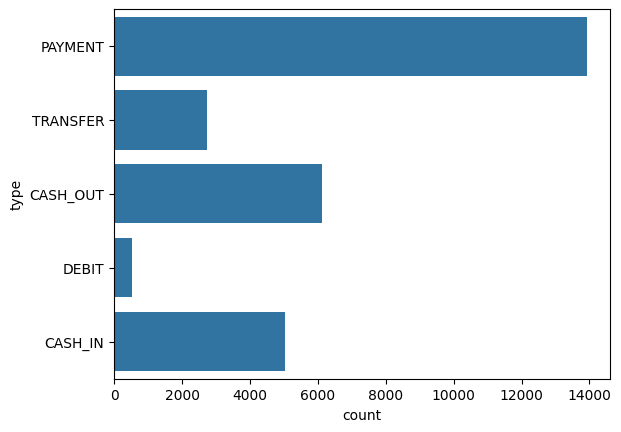

In [12]:
sns.countplot(df['type'])

In [13]:
fraud_count = df['isFraud'].value_counts()
fraud_count

0.0    28212
1.0       84
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Transaction Distribution')

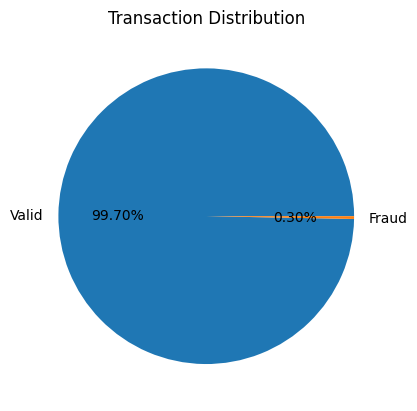

In [14]:
fraud_count = df['isFraud'].value_counts().to_dict()

# Convert the dictionary to a Pandas Series
fraud_count = pd.Series(fraud_count)

# Set the labels for the pie chart
labels = ['Valid', 'Fraud']

# Plot the pie chart
plt.pie(fraud_count, labels=labels, autopct='%.2f%%');
plt.title("Transaction Distribution")

From the above graph we can conclude , Only 0.22% transactions are Fraud

In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


To check number of unique values from each columns

In [16]:
df.nunique()

step                  8
type                  5
amount            28181
nameOrig          28296
oldbalanceOrg     18645
newbalanceOrig    14860
nameDest          17076
oldbalanceDest    13180
newbalanceDest     3667
isFraud               2
isFlaggedFraud        1
dtype: int64

In [17]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28296.000000,2.829600e+04,2.829600e+04,2.829600e+04,2.829600e+04,2.829600e+04,28296.000000,28296.0
mean,6.508199,1.357431e+05,7.667297e+05,7.823827e+05,8.484026e+05,1.191347e+06,0.002969,0.0
std,2.291113,3.013217e+05,2.126156e+06,2.166648e+06,2.513911e+06,3.106488e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966463e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950196e+04,1.964727e+04,3.685915e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601118e+05,1.386889e+05,1.407674e+05,3.655721e+05,6.675980e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [18]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values

In [19]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28296.00,28296.00,28296.00,28296.00,28296.00,28296.00,28296.00,28296.00
mean,6.51,135743.11,766729.74,782382.74,848402.55,1191347.18,0.00,0.00
std,2.29,301321.69,2126156.00,2166648.40,2513911.25,3106487.60,0.05,0.00
min,1.00,1.77,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,5966.46,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,19501.96,19647.27,3685.91,0.00,0.00,0.00,0.00
75%,8.00,160111.75,138688.91,140767.35,365572.14,667597.96,0.00,0.00
max,8.00,10000000.00,22352310.12,22465998.18,24955238.07,28783585.38,1.00,0.00


In [20]:
df.describe(include='object')

,type,nameOrig,nameDest
count,28296,28296,28296
unique,5,28296,17076
top,PAYMENT,C1231006815,C985934102
freq,13913,1,71


**Checking Correlation**

In [21]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.07,-0.04,-0.04,-0.00,0.03,-0.05,NaN
amount,0.07,1.00,0.04,0.02,0.32,0.43,0.08,NaN
oldbalanceOrg,-0.04,0.04,1.00,1.00,0.14,0.11,-0.00,NaN
newbalanceOrig,-0.04,0.02,1.00,1.00,0.15,0.11,-0.02,NaN
oldbalanceDest,-0.00,0.32,0.14,0.15,1.00,0.92,-0.01,NaN
newbalanceDest,0.03,0.43,0.11,0.11,0.92,1.00,-0.01,NaN
isFraud,-0.05,0.08,-0.00,-0.02,-0.01,-0.01,1.00,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

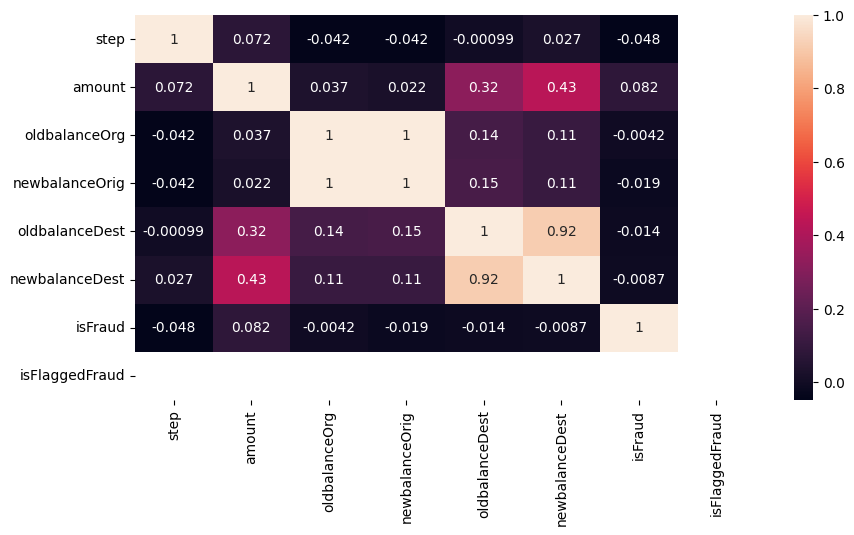

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

from the above graph, There is multi-collinearity between oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest

so we should remove one of them column from these multi-collinearty columns when we split into x and y but i don't want to remove it because features are already low.

**Feature Engineering**

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,3271,170136.00,160296.36,10143,0.00,0.00,0.00,0.00
1,1,3,1864.28,9756,21249.00,19384.72,10589,0.00,0.00,0.00,0.00
2,1,4,181.00,4372,181.00,0.00,2452,0.00,0.00,1.00,0.00
3,1,1,181.00,25968,181.00,0.00,2180,21182.00,0.00,1.00,0.00
4,1,3,11668.14,15330,41554.00,29885.86,4769,0.00,0.00,0.00,0.00


**Data Split(X and Y)**

In [25]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']
y.value_counts()

0.00    28212
1.00       84
Name: isFraud, dtype: int64

**There is unbalanced, so we should use SMOTE**

In [26]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)
y.value_counts()

0.00    28212
1.00    28212
Name: isFraud, dtype: int64

Now it is balanced

**Feature Scaling**

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

**Train - Test Split**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

**Applying Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(x_test)

**Check Performance of the model**

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
confusion_matrix(y_test,y_pred)

array([[7268, 1195],
       [ 465, 8000]])

In [33]:
accuracy_score(y_test,y_pred)

0.901937618147448

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      8463
         1.0       0.87      0.95      0.91      8465

    accuracy                           0.90     16928
   macro avg       0.90      0.90      0.90     16928
weighted avg       0.90      0.90      0.90     16928



**we want to check actual accuracy using cross val score**

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cvs = cross_val_score(log_reg,x,y,cv=3)

In [37]:
print(cvs)
print(cvs.mean())

[0.63047639 0.90440238 0.90121225]
0.812030341698568


There is the situation of underfit where cross val score is less then than predicting score

**what's the features is best for my model**

In [38]:
from sklearn.feature_selection import chi2, SelectKBest

In [39]:
chi_best_col = SelectKBest(chi2,k=8)
kbest = chi_best_col.fit_transform(x,y)
np.array(df.drop(columns=['isFraud']).columns)[chi_best_col.get_support()]

array(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'], dtype=object)

In [40]:
pd.DataFrame(list(zip(df.drop(columns=['isFraud']).columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
6,nameDest,3496.94
0,step,2742.87
5,newbalanceOrig,913.32
7,oldbalanceDest,588.11
2,amount,565.78
8,newbalanceDest,217.45
1,type,129.73
4,oldbalanceOrg,78.35
3,nameOrig,34.55
9,isFlaggedFraud,NaN


**Now I want to apply Logistic Regression using 8 important Features**

In [41]:
x1 = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y1 = df['isFraud']

In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.30,random_state=0)

**Apply Logistic Regression**

In [43]:
log_reg1 = LogisticRegression()

In [44]:
log_reg1 = LogisticRegression()
log_reg1.fit(x1_train,y1_train)

LogisticRegression()

In [45]:
y2_pred = log_reg1.predict(x1_test)
print(classification_report(y1_test,y2_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8464
         1.0       0.60      0.12      0.20        25

    accuracy                           1.00      8489
   macro avg       0.80      0.56      0.60      8489
weighted avg       1.00      1.00      1.00      8489



In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cvs1 = cross_val_score(log_reg1,x1,y1,cv=3)
print(cvs1)
print(cvs1.mean())

[0.99756149 0.9971374  0.99607718]
0.9969253604749788


### **Now, Our model accuracy is 99% and it's very good accuracy**